In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [13]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,vatika gurgaon,sector 83,1.25,6313.0,1980.0,Super Built up area 1980(183.95 sq.m.),3,3,2,2.0,West,Relatively New,1980.0,NaN,NaN,0,1,0,0,0,0,119,660.000000
1,flat,paras dews,sector 106,1.17,6648.0,1760.0,Super Built up area 1760(163.51 sq.m.)Built Up...,3,4,3+,12.0,West,Relatively New,1760.0,1186.0,1130.0,0,1,0,0,0,0,49,586.666667
2,flat,shapoorji pallonji joyville gurugram,sector 102,2.40,10545.0,2276.0,Super Built up area 2162(200.86 sq.m.),4,4,3+,15.0,North-East,Relatively New,2162.0,NaN,NaN,0,0,0,0,0,0,108,569.000000
3,flat,tulip violet,sector 69,1.65,8871.0,1860.0,Built Up area: 1578 (146.6 sq.m.),3,3,2,1.0,NaN,Relatively New,NaN,1578.0,NaN,0,0,0,0,0,1,69,620.000000
4,flat,satya the hermitage,sector 103,0.89,6138.0,1450.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2,3,3,1.0,NaN,Relatively New,1450.0,NaN,1081.0,0,1,0,0,0,0,75,725.000000


In [17]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

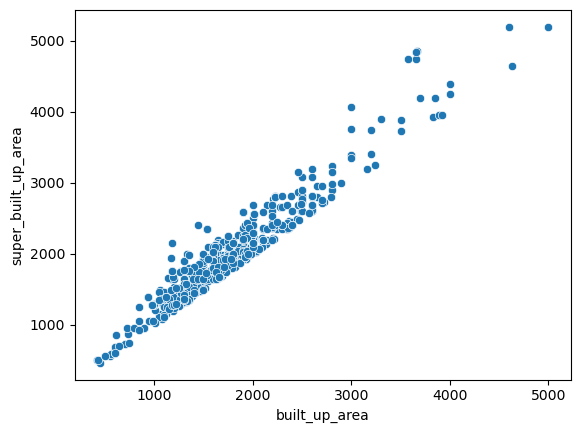

In [22]:
sns.scatterplot(x = df['built_up_area'],y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

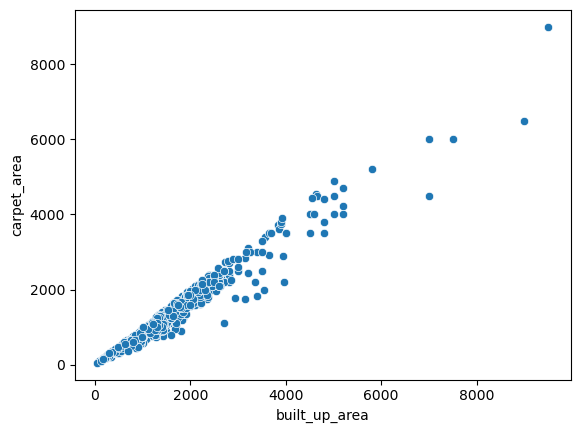

In [24]:
sns.scatterplot(x = df['built_up_area'],y = df['carpet_area'])

In [26]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

0

In [28]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [30]:
all_present_df.shape

(531, 24)

In [32]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [34]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [36]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [38]:
# both present but built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [40]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,satya the hermitage,sector 103,0.89,6138.0,1450.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2,3,3,1.0,NaN,Relatively New,1450.0,NaN,1081.0,0,1,0,0,0,0,75,725.000000
9,flat,dlf regal gardens,sector 90,1.20,6838.0,1755.0,Super Built up area 1755(163.04 sq.m.)Carpet a...,3,3,3+,15.0,South-West,Relatively New,1755.0,NaN,1400.0,0,0,0,0,0,0,118,585.000000
20,flat,dlf new town heights,sector 86,1.28,8205.0,1560.0,Super Built up area 1930(179.3 sq.m.)Carpet ar...,3,4,3+,12.0,West,Moderately Old,1930.0,NaN,1560.0,0,1,0,1,0,0,96,520.000000
21,flat,tulip violet,sector 69,1.40,8929.0,1568.0,Super Built up area 1568(145.67 sq.m.)Carpet a...,3,3,1,12.0,North,Relatively New,1568.0,NaN,1200.0,0,0,0,1,0,0,174,522.666667
29,flat,shree vardhman flora,sector 90,0.92,4907.0,1875.0,Super Built up area 1875(174.19 sq.m.)Carpet a...,3,4,3,4.0,North-East,Relatively New,1875.0,NaN,1161.0,0,1,0,0,0,0,116,625.000000


In [42]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_14340\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_14340\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [44]:
df.update(sbc_df)

In [46]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [48]:
# sb present but carpet and builtup  is null 
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [50]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,vatika gurgaon,sector 83,1.25,6313.0,1980.0,Super Built up area 1980(183.95 sq.m.),3,3,2,2.0,West,Relatively New,1980.0,NaN,NaN,0,1,0,0,0,0,119,660.000000
2,flat,shapoorji pallonji joyville gurugram,sector 102,2.40,10545.0,2276.0,Super Built up area 2162(200.86 sq.m.),4,4,3+,15.0,North-East,Relatively New,2162.0,NaN,NaN,0,0,0,0,0,0,108,569.000000
5,flat,pioneer park,sector 61,3.60,12627.0,2851.0,Super Built up area 2851(264.87 sq.m.),4,4,3,3.0,North,Moderately Old,2851.0,NaN,NaN,0,1,0,0,0,1,121,712.750000
7,flat,aipl the peaceful homes,sector 70a,2.50,10638.0,2350.0,Super Built up area 2350(218.32 sq.m.),3,4,3,8.0,South,Relatively New,2350.0,NaN,NaN,0,1,1,0,0,1,174,783.333333
8,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,Super Built up area 780(72.46 sq.m.),2,2,2,1.0,NaN,Moderately Old,780.0,NaN,NaN,0,0,0,0,0,0,0,390.000000


In [52]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_14340\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_14340\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round

In [54]:
df.update(sb_df)

In [56]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [58]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [60]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,deepak minda,manesar,1.25,4715.0,2651.0,Carpet area: 2650 (246.19 sq.m.),3,3,3+,6.0,NaN,Moderately Old,NaN,NaN,2650.0,0,1,0,0,0,0,44,883.666667
10,flat,malibu towne,sector 47,2.40,10000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3,0,0.0,West,Moderately Old,NaN,NaN,2400.0,0,0,0,0,0,1,22,800.000000
16,flat,mrg world ultimus,sector 90,0.50,6983.0,716.0,Carpet area: 716 (66.52 sq.m.),2,2,2,1.0,North-East,Under Construction,NaN,NaN,716.0,0,0,0,0,0,0,21,358.000000
22,flat,tulip violet,sector 69,1.75,9459.0,1850.0,Carpet area: 1850 (171.87 sq.m.),3,4,2,0.0,East,Relatively New,NaN,NaN,1850.0,0,0,0,0,0,1,174,616.666667
23,flat,pgr shree kripaluji apartment,sector 52,1.40,6087.0,2300.0,Carpet area: 2300 (213.68 sq.m.),3,3,3+,8.0,North-East,Relatively New,NaN,NaN,2300.0,0,0,0,0,0,1,80,766.666667


In [62]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_14340\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_14340\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet

In [64]:
df.update(c_df)

In [66]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

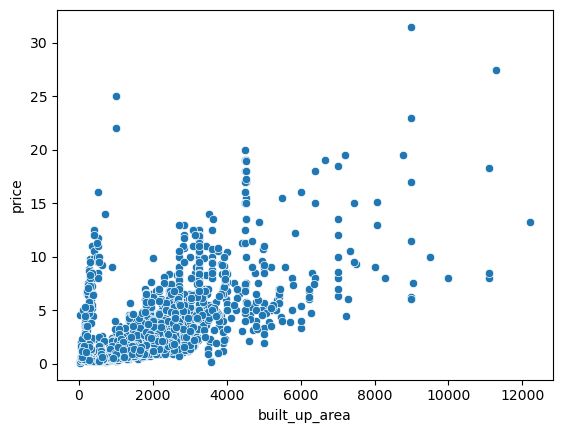

In [70]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [72]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [74]:
anamoly_df.sample(5)

,price,area,built_up_area
2216,4.25,1836.0,1836.0
3527,7.10,2259.0,240.0
1312,2.60,2273.0,1773.0
167,2.79,1860.0,1564.0
3470,9.50,4914.0,546.0


In [76]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [78]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

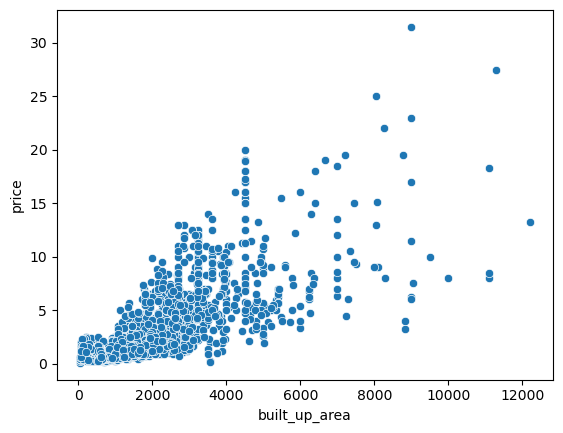

In [80]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [82]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [84]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,vatika gurgaon,sector 83,1.25,6313.0,3,3,2,2.0,West,Relatively New,1792.0,0,1,0,0,0,0,119
1,flat,paras dews,sector 106,1.17,6648.0,3,4,3+,12.0,West,Relatively New,1186.0,0,1,0,0,0,0,49
2,flat,shapoorji pallonji joyville gurugram,sector 102,2.40,10545.0,4,4,3+,15.0,North-East,Relatively New,1957.0,0,0,0,0,0,0,108
3,flat,tulip violet,sector 69,1.65,8871.0,3,3,2,1.0,NaN,Relatively New,1578.0,0,0,0,0,0,1,69
4,flat,satya the hermitage,sector 103,0.89,6138.0,2,3,3,1.0,NaN,Relatively New,1257.0,0,1,0,0,0,0,75


In [86]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [89]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
365,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
418,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
436,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
446,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
618,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
799,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
914,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1335,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
1509,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
1772,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21


In [91]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [93]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_14340\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [95]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# facing

<Axes: ylabel='count'>

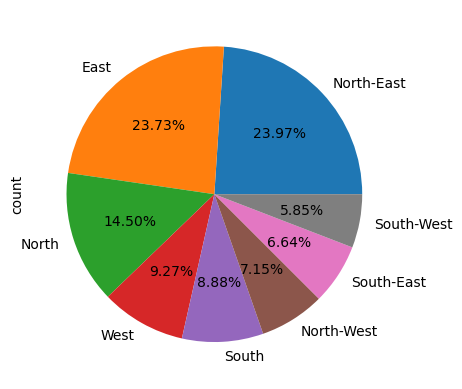

In [98]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [100]:
df.drop(columns=['facing'],inplace=True)

In [102]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
592,flat,sare green parc phase 3,sector 92,0.95,4857.0,4,3,3,4.0,Moderately Old,1770.0,0,0,0,0,0,0,67
387,flat,sare crescent parc,sector 92,0.95,5013.0,4,5,3+,13.0,Undefined,1895.0,0,0,0,0,0,0,0
299,house,bptp visionnaire,sector 70a,5.40,20690.0,4,5,3+,3.0,Relatively New,2610.0,1,1,1,1,0,1,136
2609,flat,m3m skycity,sector 65,2.80,15317.0,3,3,0,14.0,Undefined,1828.0,0,0,0,0,0,0,39
390,flat,emaar emerald hills,sector 65,1.95,13929.0,3,3,3+,1.0,New Property,1556.0,0,0,1,0,0,1,117


In [104]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [106]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
446,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [108]:
df.drop(index=446,inplace=True)

In [110]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# agePossession

In [113]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              292
Under Construction     263
Name: count, dtype: int64

In [125]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
13,house,independent,sector 3,3.50,9211.0,1,1,0,1.0,Undefined,3800.0,0,0,0,0,0,0,0
43,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,0,45
54,house,independent,sector 2,0.70,7778.0,1,1,0,1.0,Undefined,900.0,0,0,0,0,0,0,0
62,flat,sare green parc,sector 92,0.85,6538.0,3,2,2,20.0,Undefined,1300.0,0,0,0,0,0,0,0
74,flat,czar mahira homes 63a,sector 63a,0.42,7407.0,3,2,2,1.0,Undefined,630.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,flat,ansal height 86,sector 86,0.80,5882.0,2,2,0,1.0,Undefined,1360.0,0,0,0,0,0,0,0
3515,house,independent,sector 17,3.00,11111.0,4,4,0,1.0,Undefined,3000.0,0,0,0,0,0,0,0
3517,flat,ramprasta awho,sector 95,0.92,5257.0,3,3,3+,13.0,Undefined,1750.0,0,0,0,0,0,0,0
3521,house,independent,sector 3,0.92,15257.0,4,1,0,1.0,Undefined,603.0,0,0,0,0,0,0,0


In [127]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [129]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [131]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         583
Old Property           326
Under Construction     277
Undefined               55
Name: count, dtype: int64

In [133]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [135]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [137]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
New Property           598
Moderately Old         590
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [139]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [141]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [143]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
Moderately Old         621
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [145]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [147]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)